In [3]:
suppressPackageStartupMessages({
    library(ArchR)
    library(rhdf5)
    library(parallel)
    library(dplyr)
    library("BSgenome.Mmusculus.UCSC.mm10")
    })


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [4]:
addArchRGenome("mm10")
addArchRThreads(threads = 16)

Setting default genome to Mm10.

Setting default number of Parallel threads to 16.



In [5]:
data_name <- 'Chen_2019'
input_dir <- '/home/siluo/projects/sc_chromatin_benchmark/raw_data/'
output_dir <- '/home/siluo/projects/sc_chromatin_benchmark/cleaned_data/'

In [4]:
inputFiles <- paste0(input_dir, data_name, "/fragments.sort.bed.gz")
names(inputFiles) <- c(data_name)

# Load raw data

In [6]:
# create arrow file
ArrowFiles <- createArrowFiles(
  inputFiles = inputFiles,
  sampleNames = names(inputFiles),
  minTSS = 0, 
  minFrags = 0, 
  addTileMat = FALSE,
  addGeneScoreMat = FALSE
)

Using GeneAnnotation set by addArchRGenome(Mm10)!

Using GeneAnnotation set by addArchRGenome(Mm10)!

ArchR logging to : ArchRLogs/ArchR-createArrows-6999d2c765e-Date-2023-03-28_Time-16-49-29.log
If there is an issue, please report to github with logFile!

Cleaning Temporary Files

2023-03-28 16:49:29 : Batch Execution w/ safelapply!, 0 mins elapsed.

(Chen_2019 : 1 of 1) Determining Arrow Method to use!

2023-03-28 16:49:29 : (Chen_2019 : 1 of 1) Reading In Fragments from inputFiles (readMethod = tabix), 0 mins elapsed.

2023-03-28 16:49:29 : (Chen_2019 : 1 of 1) Tabix Bed To Temporary File, 0 mins elapsed.

2023-03-28 16:51:39 : (Chen_2019 : 1 of 1) Successful creation of Temporary File, 2.161 mins elapsed.

2023-03-28 16:51:39 : (Chen_2019 : 1 of 1) Creating ArrowFile From Temporary File, 2.162 mins elapsed.

You created a large dataset with compression and chunking.
The chunk size is equal to the dataset dimensions.
If you want to read subsets of the dataset, you should testsmaller

In [7]:
# create archR project
projChen_2019 <- ArchRProject(
  ArrowFiles = ArrowFiles, 
  outputDirectory = "Chen_2019",
  copyArrows = FALSE, #This is recommended so that if you modify the Arrow files you have an original copy for later usage.
  showLogo = FALSE
)

Using GeneAnnotation set by addArchRGenome(Mm10)!

Using GeneAnnotation set by addArchRGenome(Mm10)!

Validating Arrows...

Getting SampleNames...

1 


Getting Cell Metadata...

1 


Merging Cell Metadata...

Initializing ArchRProject...



In [8]:
# add Tile matrix
addTileMatrix(
  input = projChen_2019,
  chromSizes = if (inherits(projChen_2019, "ArchRProject")) getChromSizes(projChen_2019) else NULL,
  blacklist = if (inherits(projChen_2019, "ArchRProject")) getBlacklist(projChen_2019) else NULL,
  tileSize = 500,
  binarize = TRUE,
  excludeChr = c("chrM", "chrY"),
  threads = getArchRThreads(),
  parallelParam = NULL,
  force = TRUE,
  logFile = createLogFile("addTileMatrix")
)

ArchR logging to : ArchRLogs/ArchR-addTileMatrix-69995472f418-Date-2023-03-28_Time-17-21-48.log
If there is an issue, please report to github with logFile!

2023-03-28 17:22:00 : Batch Execution w/ safelapply!, 0 mins elapsed.

You created a large dataset with compression and chunking.
The chunk size is equal to the dataset dimensions.
If you want to read subsets of the dataset, you should testsmaller chunk sizes to improve read times.

2023-03-28 17:22:51 : Adding TileMatrix to Chen_2019 for Chr (1 of 20)!, 0.857 mins elapsed.

2023-03-28 17:24:32 : Adding TileMatrix to Chen_2019 for Chr (2 of 20)!, 2.542 mins elapsed.

2023-03-28 17:26:07 : Adding TileMatrix to Chen_2019 for Chr (3 of 20)!, 4.123 mins elapsed.

2023-03-28 17:27:24 : Adding TileMatrix to Chen_2019 for Chr (4 of 20)!, 5.406 mins elapsed.

2023-03-28 17:28:46 : Adding TileMatrix to Chen_2019 for Chr (5 of 20)!, 6.769 mins elapsed.

2023-03-28 17:30:07 : Adding TileMatrix to Chen_2019 for Chr (6 of 20)!, 8.127 mins elaps

class: ArchRProject 
outputDirectory: /home/siluo/projects/sc_chromatin_benchmark/scripts/data_cleaning/Chen_2019 
samples(1): Chen_2019
sampleColData names(1): ArrowFiles
cellColData names(13): Sample TSSEnrichment ... nDiFrags BlacklistRatio
numberOfCells(1): 11412731
medianTSS(1): 0
medianFrags(1): 1

In [9]:
# check how much memory is used to store the ArchRProject in memory within R:
paste0("Memory Size = ", round(object.size(projChen_2019) / 10^6, 3), " MB")
# check available matrix
getAvailableMatrices(projChen_2019)

[1] "Memory Size = 2128.8 MB"

[1] "TileMatrix"

In [10]:
saveArchRProject(ArchRProj = projChen_2019, load = FALSE) 

Copying Arrow Files...

Copying Arrow Files (1 of 1)

Saving ArchRProject...



# Per cell QC

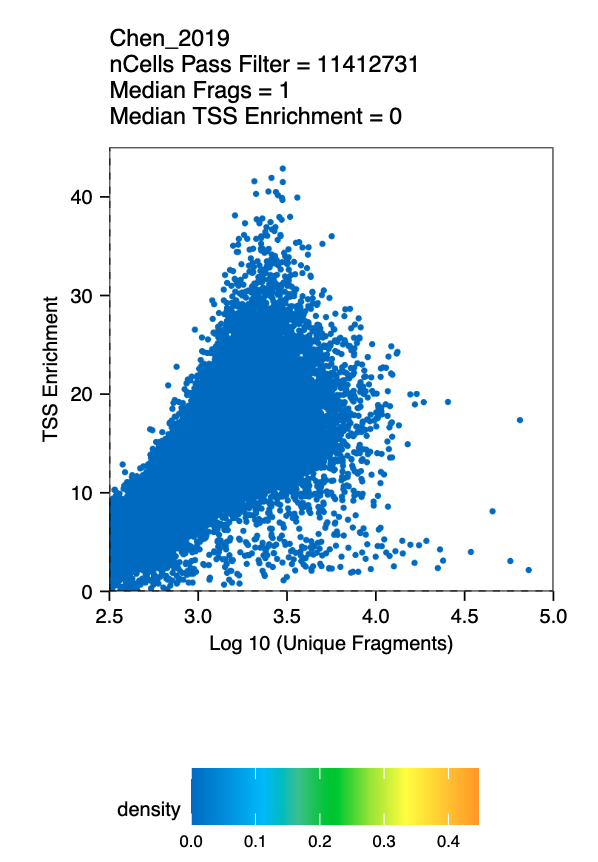
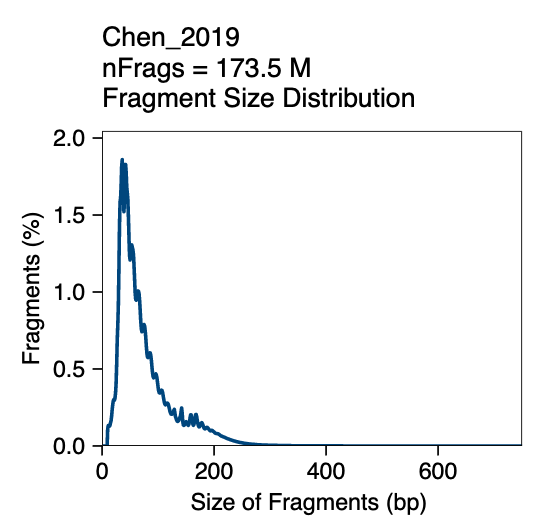

In [11]:
df2 <- read.table("../../raw_data/Chen_2019/GSE126074_AdBrainCortex_SNAREseq_chromatin.barcodes.tsv", col.names = "barcode")

In [12]:
head(df2)

,barcode
,<chr>
1,09A_GATGCGCGGCTA
2,09A_GCCATGACCCCA
3,09F_TGGACGATTTGT
4,09K_GTCTGCCATTAC
5,09F_GGATGAAGAGGG
6,09C_AGCCCGCCATGG


In [18]:
Cell_id <- sub('Chen_2019#', '', getCellNames(projChen_2019))

In [19]:
sum(Cell_id %in% df2$barcode)

[1] 10309

In [32]:
th_tss_min <- 2
th_tss_max <- 20
th_nfrag <- 500
idxPass1 <- projChen_2019$TSSEnrichment >= th_tss_min
idxPass2 <- projChen_2019$nFrags >= th_nfrag
idxPass3 <- projChen_2019$TSSEnrichment <= th_tss_max
table(data.frame(list("tss"=idxPass1, "nfrags"=idxPass2, "3"=idxPass3)))

, , X3 = FALSE

       nfrags
tss        FALSE     TRUE
  FALSE        0        0
  TRUE         0     3374

, , X3 = TRUE

       nfrags
tss        FALSE     TRUE
  FALSE 11221778       67
  TRUE    150154    37358


In [33]:
length(Cell_id[idxPass1 & idxPass2 & idxPass3])

[1] 37358

In [34]:
sum(Cell_id[idxPass1 & idxPass2 & idxPass3] %in% df2$barcode)

[1] 7745

In [35]:
# Subsetting by per cell QC
cellsPass <- projChen_2019$cellNames[idxPass1 & idxPass2 & idxPass3]

In [36]:
projChen_2019.2 <- projChen_2019[cellsPass, ]

In [37]:
# identify doublets
projChen_2019.2 <- addDoubletScores(
  input = projChen_2019.2,
  k = 30, #Refers to how many cells near a "pseudo-doublet" to count.
  knnMethod = "UMAP", #Refers to the embedding to use for nearest neighbor search with doublet projection.
  LSIMethod = 1 # "tf-logidf"
)

ArchR logging to : ArchRLogs/ArchR-addDoubletScores-69997d07d6ff-Date-2023-03-28_Time-18-23-45.log
If there is an issue, please report to github with logFile!

2023-03-28 18:23:46 : Batch Execution w/ safelapply!, 0 mins elapsed.

2023-03-28 18:23:46 : Chen_2019 (1 of 1) :  Computing Doublet Statistics, 0 mins elapsed.

Chen_2019 (1 of 1) : UMAP Projection R^2 = 0.82508

Chen_2019 (1 of 1) : UMAP Projection R^2 = 0.82508

You created a large dataset with compression and chunking.
The chunk size is equal to the dataset dimensions.
If you want to read subsets of the dataset, you should testsmaller chunk sizes to improve read times.

You created a large dataset with compression and chunking.
The chunk size is equal to the dataset dimensions.
If you want to read subsets of the dataset, you should testsmaller chunk sizes to improve read times.

ArchR logging successful to : ArchRLogs/ArchR-addDoubletScores-69997d07d6ff-Date-2023-03-28_Time-18-23-45.log



In [38]:
# remove doublets
projChen_2019.2 <- filterDoublets(projChen_2019.2)

Filtering 105 cells from ArchRProject!

	Chen_2019 : 105 of 37358 (0.3%)



In [39]:
# save the project
projChen_2019.2 <- saveArchRProject(ArchRProj = projChen_2019.2, 
                                 outputDirectory = "Chen_2019.2",
                                 load=TRUE) # load=TRUE when one want to overwrite the original files

Copying ArchRProject to new outputDirectory : /home/siluo/projects/sc_chromatin_benchmark/scripts/data_cleaning/Chen_2019.2

Copying Arrow Files...

Copying Arrow Files (1 of 1)

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 1): Chen_2019

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|

In [43]:
# plot QC metrics
df <- getCellColData(projChen_2019.2, select = c("log10(nFrags)", "TSSEnrichment"))
p1 <- ggPoint(
  x = df[,1], 
  y = df[,2], 
  colorDensity = TRUE,
  continuousSet = "sambaNight",
  xlabel = "Log10 Unique Fragments",
  ylabel = "TSS Enrichment",
  xlim = c(log10(500), quantile(df[,1], probs = 0.99)),
  ylim = c(0, quantile(df[,2], probs = 0.99))
) + geom_hline(yintercept = th_tss_min, lty = "dashed") + geom_vline(xintercept = log10(th_nfrag), lty = "dashed")


p2 <- plotGroups(
  ArchRProj = projChen_2019.2, 
  groupBy = "Sample", 
  colorBy = "cellColData", 
  name = "TSSEnrichment",
  plotAs = "violin",
  alpha = 0.4,
  addBoxPlot = TRUE
)
p3 <- plotGroups(
  ArchRProj = projChen_2019.2, 
  groupBy = "Sample", 
  colorBy = "cellColData", 
  name = "log10(nFrags)",
  plotAs = "violin",
  alpha = 0.4,
  addBoxPlot = TRUE
)
p4 <- plotFragmentSizes(ArchRProj = projChen_2019.2)
p5 <- plotTSSEnrichment(ArchRProj = projChen_2019.2)

1 


1 


ArchR logging to : ArchRLogs/ArchR-plotFragmentSizes-699940499b23-Date-2023-03-28_Time-18-42-15.log
If there is an issue, please report to github with logFile!

2023-03-28 18:42:16 : Chen_2019 Computing FragmentSizes (1 of 1)!, 0.016 mins elapsed.

2023-03-28 18:43:57 : Chen_2019 Finished Computing FragmentSizes (1 of 1)!, 1.698 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotFragmentSizes-699940499b23-Date-2023-03-28_Time-18-42-15.log

ArchR logging to : ArchRLogs/ArchR-plotTSSEnrichment-69996f7367f6-Date-2023-03-28_Time-18-43-57.log
If there is an issue, please report to github with logFile!

2023-03-28 18:43:58 : Chen_2019 Computing TSS (1 of 1)!, 0.021 mins elapsed.

2023-03-28 18:45:41 : Chen_2019 Finished Computing TSS (1 of 1)!, 1.727 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotTSSEnrichment-69996f7367f6-Date-2023-03-28_Time-18-43-57.log



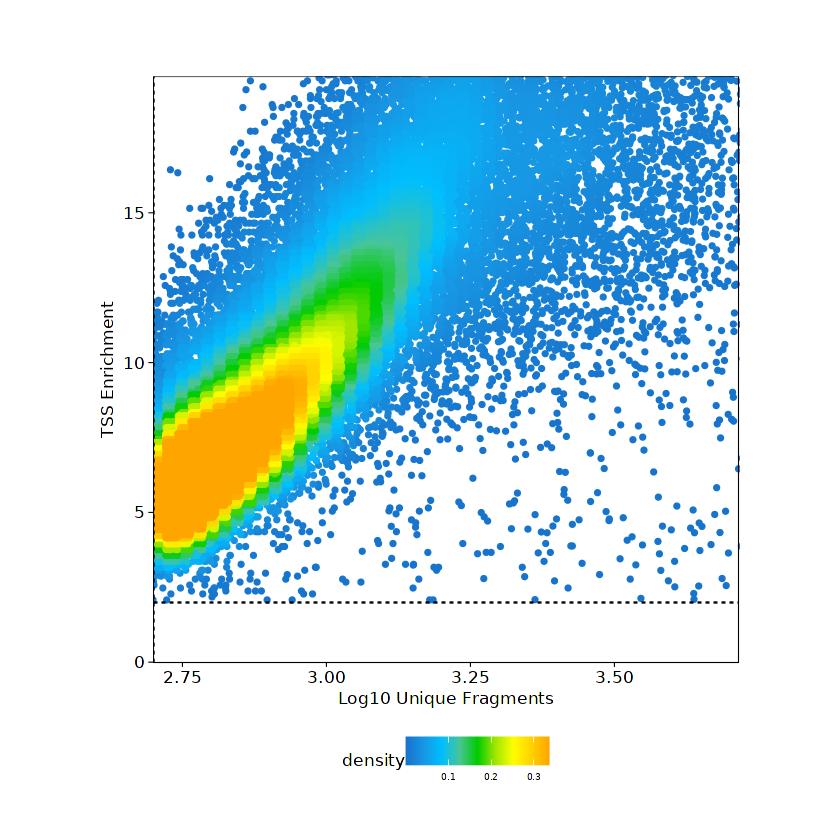

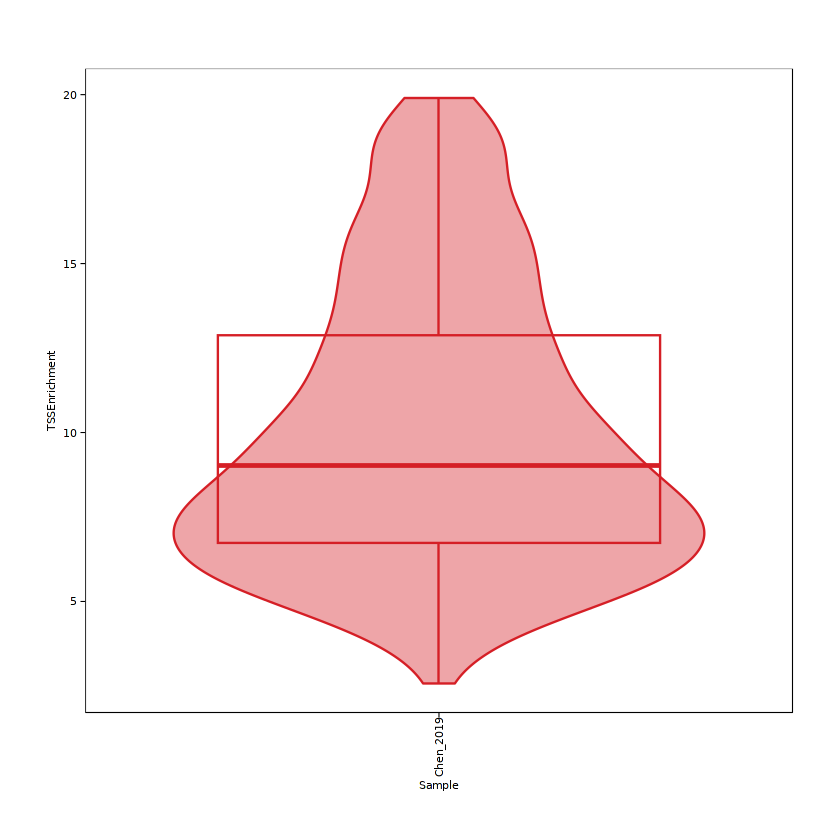

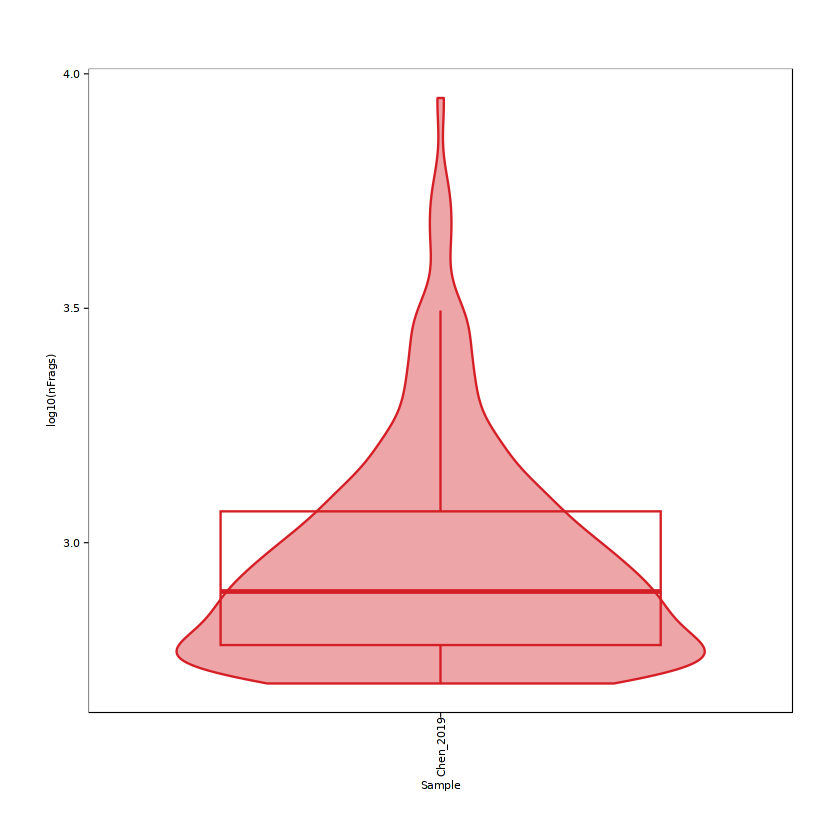

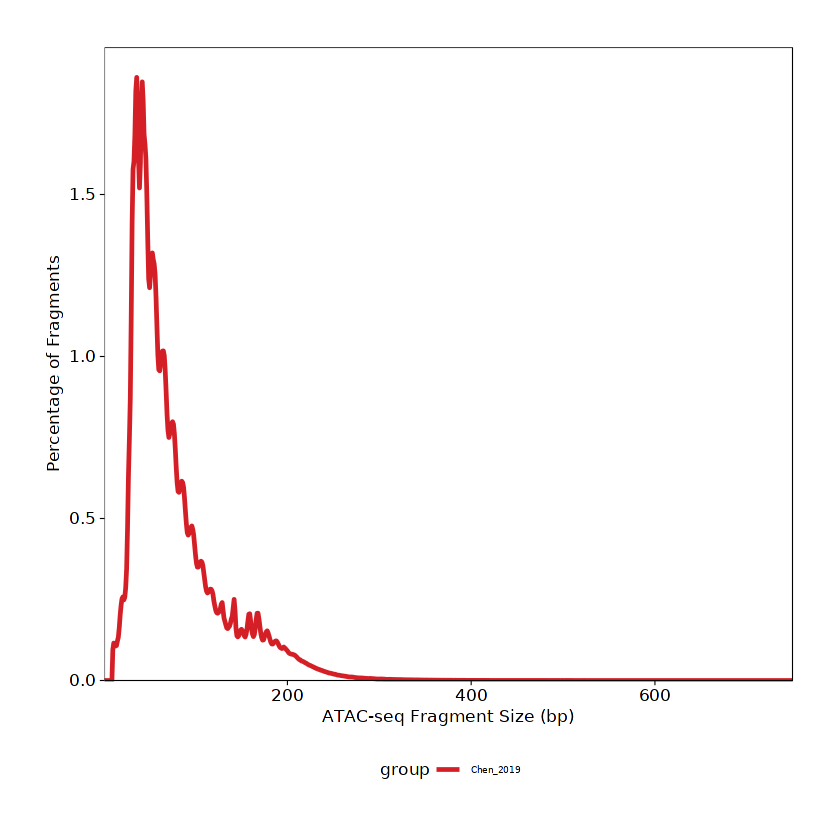

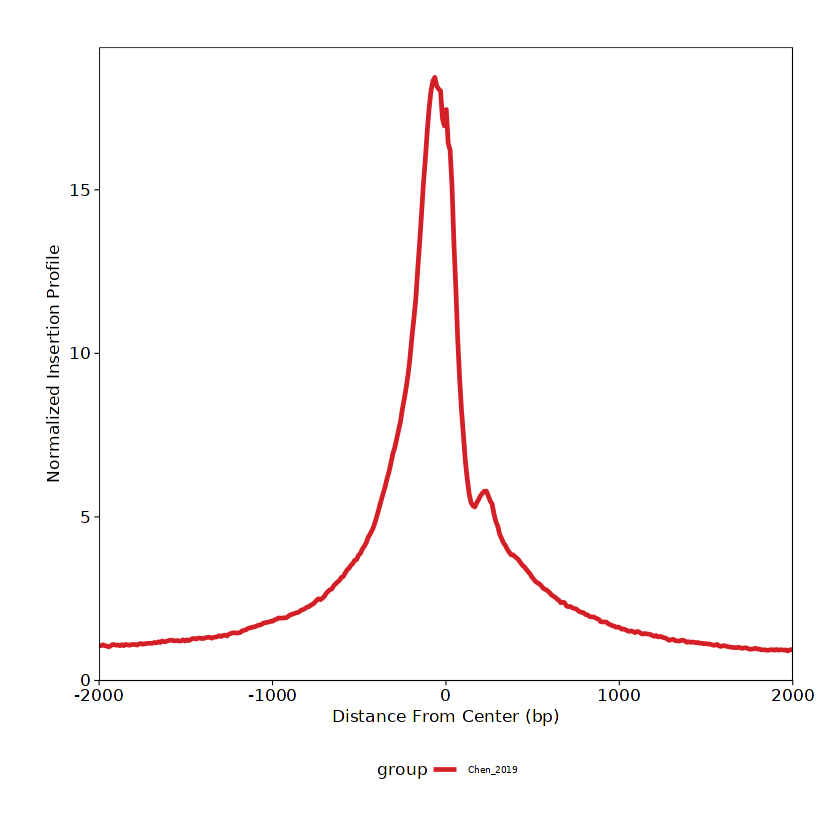

In [44]:
p1
p2
p3
p4
p5

In [45]:
df_keep <- data.frame(sub('Chen_2019#', '', rownames(getCellColData(projChen_2019.2))))
colnames(df_keep) <- c("cell_id")
rownames(df_keep) <- df_keep$cell_id
head(df_keep)

,cell_id
,<chr>
09E_CCCGTGTTATCT,09E_CCCGTGTTATCT
09G_ACATCTCCGAGC,09G_ACATCTCCGAGC
09B_GAAGTTCTGCTC,09B_GAAGTTCTGCTC
09I_ACTCGTTGGTCA,09I_ACTCGTTGGTCA
09G_ATCTCCGAGCCC,09G_ATCTCCGAGCCC
09I_TGGCTGTCCCCG,09I_TGGCTGTCCCCG


In [47]:
write.table(df_keep, file='Cells_atac_Chen_2019.txt', sep='\t', quote = FALSE, row.names=FALSE, col.names=FALSE)

# Clustering & selecting resolution and ndim

In [20]:
projChen_2019.2 <- loadArchRProject(path = "Chen_2019.2", force = FALSE, showLogo = FALSE)

Successfully loaded ArchRProject!



In [21]:
cells <- read.table("Cells_Chen_2019.txt")
head(cells)

,V1
,<chr>
1,09A_AAAGTAAAAGGA
2,09A_AACCAGTGTACG
3,09A_AACCGGGGATTT
4,09A_AACCTCGTTTGC
5,09A_AAGACTTTCCAC
6,09A_AAGGGACGAAGG


In [22]:
projChen_2019.3 <- subsetCells(ArchRProj = projChen_2019.2, paste(cellNames = 'Chen_2019#', cells$V1, sep=""))

In [23]:
# save the project
projChen_2019.3 <- saveArchRProject(ArchRProj = projChen_2019.3, 
                                 outputDirectory = "Chen_2019.3",
                                 load=TRUE) # load=TRUE when one want to overwrite the original files

Copying ArchRProject to new outputDirectory : /home/siluo/projects/sc_chromatin_benchmark/scripts/data_cleaning/Chen_2019.3

Copying Arrow Files...

Copying Arrow Files (1 of 1)

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 1): Chen_2019

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|

In [24]:
n_LSI <- 30
n_iteration <- 3

projChen_2019.3 <- addIterativeLSI(
  ArchRProj = projChen_2019.3,
  useMatrix = "TileMatrix",
  iterations = n_iteration,
  clusterParams = list( #See Seurat::FindClusters
    resolution = c(0.2, 0.6, 1),
    n.start = 10),
  varFeatures = 25000,
  dimsToUse = 1:n_LSI,
  scaleDims = TRUE, # by default
  force = TRUE
  )

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-10fcb17db1282-Date-2023-03-28_Time-20-16-31.log
If there is an issue, please report to github with logFile!

2023-03-28 20:16:32 : Computing Total Across All Features, 0.001 mins elapsed.

2023-03-28 20:16:33 : Computing Top Features, 0.02 mins elapsed.

###########
2023-03-28 20:16:35 : Running LSI (1 of 3) on Top Features, 0.052 mins elapsed.
###########

2023-03-28 20:16:35 : Creating Partial Matrix, 0.052 mins elapsed.

2023-03-28 20:17:50 : Computing LSI, 1.3 mins elapsed.

2023-03-28 20:18:03 : Identifying Clusters, 1.515 mins elapsed.

2023-03-28 20:18:10 : Identified 3 Clusters, 1.632 mins elapsed.

2023-03-28 20:18:10 : Saving LSI Iteration, 1.632 mins elapsed.

2023-03-28 20:18:25 : Creating Cluster Matrix on the total Group Features, 1.887 mins elapsed.

2023-03-28 20:20:30 : Computing Variable Features, 3.977 mins elapsed.

###########
2023-03-28 20:20:30 : Running LSI (2 of 3) on Variable Features, 3.97

In [26]:
projChen_2019.3 <- addUMAP(
    ArchRProj = projChen_2019.3, 
    name = paste0("UMAP_ndim",n_LSI),
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    force = TRUE
  )

20:26:04 UMAP embedding parameters a = 0.583 b = 1.334

20:26:04 Read 5199 rows and found 30 numeric columns

20:26:04 Using Annoy for neighbor search, n_neighbors = 30

20:26:04 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:26:05 Writing NN index file to temp file /tmp/RtmpsCxDzT/file10fcb6055e4fc

20:26:05 Searching Annoy index using 64 threads, search_k = 3000

20:26:05 Annoy recall = 100%

20:26:07 Commencing smooth kNN distance calibration using 64 threads
 with target n_neighbors = 30

20:26:08 Initializing from normalized Laplacian + noise (using irlba)

20:26:08 Commencing optimization for 500 epochs, with 257890 positive edges

20:26:15 Optimization finished

20:26:15 Creating temp model dir /tmp/RtmpsCxDzT/dir10fcb5e014139

20:26:15 Creating dir /tmp/Rtm

In [31]:
projChen_2019.3 <- addClusters(
    input = projChen_2019.3,
    method = "Seurat",
    name = paste0("Clusters_ndim",n_LSI),
    resolution = 0.6,
    algorithm = 3,
    dimsToUse = 1:n_LSI,
    force = TRUE
    )

ArchR logging to : ArchRLogs/ArchR-addClusters-10fcb6538071d-Date-2023-03-28_Time-20-28-00.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Clusters_ndim30

2023-03-28 20:28:00 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5199
Number of edges: 453152

Running smart local moving algorithm...
Maximum modularity in 10 random starts: 0.7708
Number of communities: 5
Elapsed time: 3 seconds


2023-03-28 20:28:10 : Testing Outlier Clusters, 0.17 mins elapsed.

2023-03-28 20:28:10 : Assigning Cluster Names to 5 Clusters, 0.17 mins elapsed.

2023-03-28 20:28:11 : Finished addClusters, 0.175 mins elapsed.



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-10fcb4d25beba-Date-2023-03-28_Time-20-28-11.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-10fcb4d25beba-Date-2023-03-28_Time-20-28-11.log



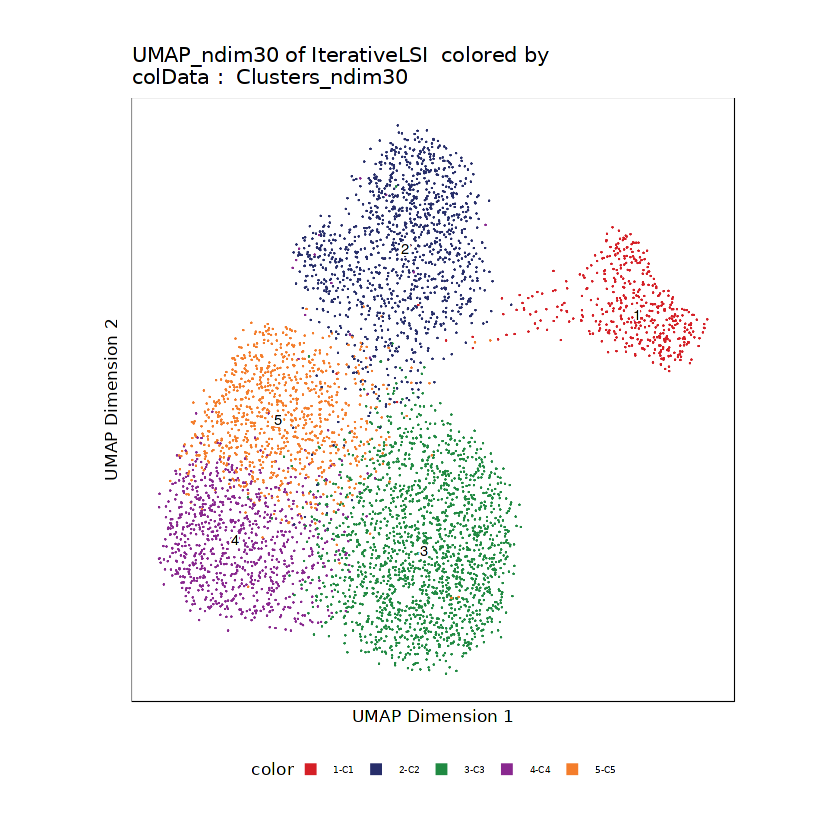

In [32]:
plotEmbedding(ArchRProj = projChen_2019.3, 
              colorBy = "cellColData", 
              name = "Clusters_ndim30", 
              embedding = "UMAP_ndim30")

In [33]:
projChen_2019.3 <- addClusters(
    input = projChen_2019.3,
    method = "Seurat",
    name = paste0("Clusters_ndim",n_LSI),
    resolution = 1,
    algorithm = 3,
    dimsToUse = 1:n_LSI,
    force = TRUE
    )

ArchR logging to : ArchRLogs/ArchR-addClusters-10fcb79a8983-Date-2023-03-28_Time-20-28-18.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Clusters_ndim30

2023-03-28 20:28:18 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5199
Number of edges: 453152

Running smart local moving algorithm...
Maximum modularity in 10 random starts: 0.6853
Number of communities: 6
Elapsed time: 3 seconds


2023-03-28 20:28:30 : Testing Outlier Clusters, 0.199 mins elapsed.

2023-03-28 20:28:30 : Assigning Cluster Names to 6 Clusters, 0.199 mins elapsed.

2023-03-28 20:28:30 : Finished addClusters, 0.2 mins elapsed.



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-10fcb45a35863-Date-2023-03-28_Time-20-28-30.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-10fcb45a35863-Date-2023-03-28_Time-20-28-30.log



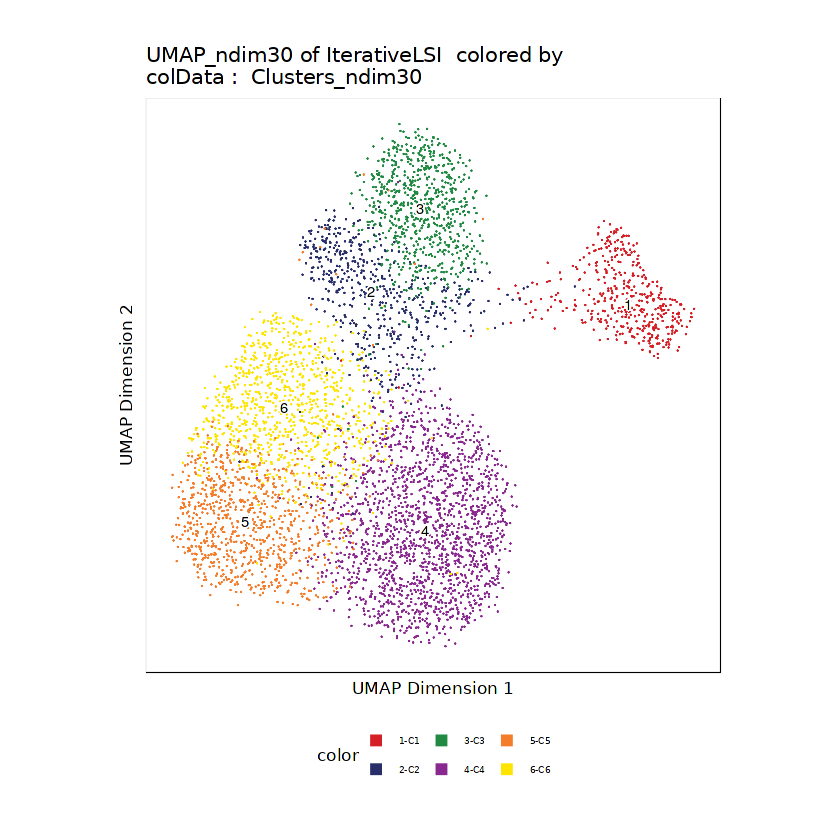

In [34]:
plotEmbedding(ArchRProj = projChen_2019.3, 
              colorBy = "cellColData", 
              name = "Clusters_ndim30", 
              embedding = "UMAP_ndim30")

In [35]:
projChen_2019.3 <- addClusters(
    input = projChen_2019.3,
    method = "Seurat",
    name = paste0("Clusters_ndim",n_LSI),
    resolution = 1.4,
    algorithm = 3,
    dimsToUse = 1:n_LSI,
    force = TRUE
    )

ArchR logging to : ArchRLogs/ArchR-addClusters-10fcb5da061ef-Date-2023-03-28_Time-20-28-32.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Clusters_ndim30

2023-03-28 20:28:33 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5199
Number of edges: 453152

Running smart local moving algorithm...
Maximum modularity in 10 random starts: 0.6098
Number of communities: 6
Elapsed time: 3 seconds


2023-03-28 20:28:43 : Testing Outlier Clusters, 0.176 mins elapsed.

2023-03-28 20:28:43 : Assigning Cluster Names to 6 Clusters, 0.177 mins elapsed.

2023-03-28 20:28:43 : Finished addClusters, 0.177 mins elapsed.



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-10fcb2fd35208-Date-2023-03-28_Time-20-28-43.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-10fcb2fd35208-Date-2023-03-28_Time-20-28-43.log



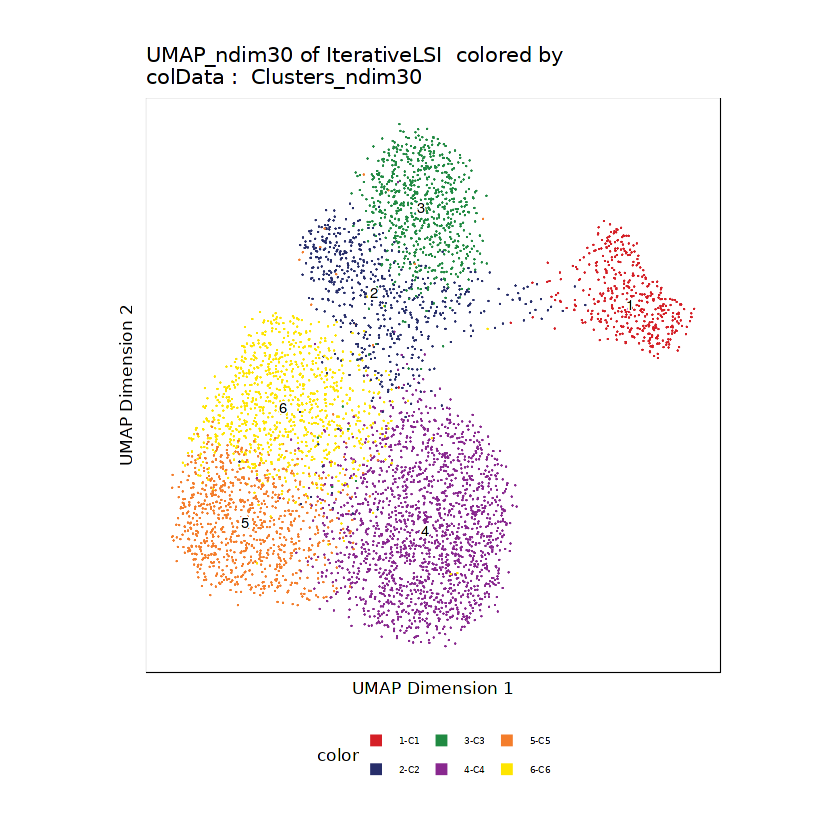

In [36]:
plotEmbedding(ArchRProj = projChen_2019.3, 
              colorBy = "cellColData", 
              name = "Clusters_ndim30", 
              embedding = "UMAP_ndim30")